In [7]:
import pandas as pd
import json

# Absolute path to your file
path = r"C:\Users\ashiv\OneDrive\Documents\GIT HUB PROJECTS\Customer Agent\data\processed\dialog_pairs.jsonl"

# Load JSONL into pandas
data = []
with open(path, "r", encoding="utf-8") as f:
    for line in f:
        data.append(json.loads(line.strip()))

df = pd.DataFrame(data)
print(f"✅ Loaded {len(df)} dialog pairs")
df.head()


✅ Loaded 16173 dialog pairs


,context,response
0,"hi, is there a CLI command to roll back any up...",your recourse is to re-install fresh the older...
1,A LiveCD iso can be burned to a DVD-R and run ...,"I hope so, or the custom DVDs I've done are wo..."
2,"hello, is there a way to adjust gamma settings...",for me i have my nvidia settings manager and i...
3,does ubuntu come with a firewall by default?,no iptables rule is loaded by deault on ubuntu
4,Can someone tell me howto get rid of Google Ch...,sudo dpkg -l |grep -i chrom ----> sudo apt-get...


In [8]:
# Check dataframe structure
df.info()

# Check for any missing/null values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16173 entries, 0 to 16172
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   context   16173 non-null  object
 1   response  16173 non-null  object
dtypes: object(2)
memory usage: 252.8+ KB


context     0
response    0
dtype: int64

In [9]:
# Add length columns
df["context_len"] = df["context"].apply(lambda x: len(x.split()))
df["response_len"] = df["response"].apply(lambda x: len(x.split()))

# Quick statistics
df[["context_len", "response_len"]].describe()


,context_len,response_len
count,16173.000000,16173.000000
mean,20.720769,8.545601
std,13.937422,7.539834
min,1.000000,1.000000
25%,11.000000,3.000000
50%,17.000000,6.000000
75%,27.000000,12.000000
max,100.000000,84.000000


Here's a breakdown based on the stats and the nature of the dataset:

## Strengths:
Real Conversations: The Ubuntu Dialogue Corpus contains actual interactions between users seeking help and others providing it on IRC/forums. This means it captures realistic language, question types, and response patterns within its domain.
Specific Domain: If your goal is to build an agent specifically for Ubuntu/Linux technical support or discussion, this dataset is highly relevant. It contains domain-specific terminology and common problems.
Paired Data: You have clear context-response pairs, which is exactly what's needed for supervised fine-tuning of generative models or training retrieval models.
Context Length: The average context length (~21 words, median 17) seems reasonable for a turn in a conversation. It suggests users often provide a decent amount of information in their queries.

## Weaknesses & Considerations:

Dataset Size (count = 16,173): By modern standards, especially for training large language models, 16,173 pairs is quite small.
Training from scratch: Definitely not enough data to train a capable conversational model from scratch.
Fine-tuning: It might be sufficient for fine-tuning a powerful pre-trained model (like T5, BART, GPT variants) to adapt it to the Ubuntu domain and conversational style. However, even for fine-tuning, more data is often better for robustness and performance.
Short Response Length (response_len mean ~8.5, median 6): This is a significant point.
Implication: The model trained or fine-tuned on this data will likely learn to generate very short responses. The median response is only 6 words long.
Suitability: This could be acceptable if you want an agent that primarily gives quick commands, short pointers, or confirmations. However, if you need an agent capable of providing detailed explanations, multi-step instructions, or engaging in longer diagnostic dialogues, this dataset alone might train it to be overly brief and potentially unhelpful.
Skewness: The fact that the mean (8.5) is higher than the median (6) and the max is 84 indicates that some longer responses exist, but they are not typical. The model's behavior will likely gravitate towards the more common shorter responses.

Data Quality & Noise: Forum/IRC data can be noisy. It might contain:
Off-topic chat
Incomplete conversations
Incorrect or suboptimal answers
Typos and informal language
Code snippets that might require special handling.
You would likely need significant cleaning and filtering.
Narrow Domain: The agent will be specialized for Ubuntu/Linux technical chat. It will likely perform poorly on general conversation or other topics.

## Conclusion:
Is it usable? Yes, potentially, but primarily for fine-tuning a pre-trained model, not training from scratch.
Is it good? It has limitations, mainly its small size and the strong bias towards short responses.
Suitability for an Agent:
Good for: An agent focused on providing quick, concise answers or commands within the Ubuntu technical support domain, assuming you use fine-tuning.
Poor for: An agent needing to generate detailed explanations, handle complex multi-turn dialogues requiring long responses, or converse outside the specific technical domain. Also p oor for training a model from the ground up.
Recommendations:
Use Fine-Tuning: Leverage a strong pre-trained conversational model as your base.
Address Response Length: Be aware of the bias towards short responses. You might need to:
Filter the dataset to keep only pairs with longer, more informative responses (but this will reduce the size further).
Augment the dataset with other sources containing longer technical explanations.
Use techniques during inference (like adjusting generation parameters or using specific prompts) to encourage longer outputs, although this can be tricky if the training data strongly favors brevity.
Consider a Retrieval-Augmented Generation (RAG) approach, where the agent retrieves relevant documentation snippets (which might be longer) and synthesizes an answer, rather than purely relying on the learned dialogue patterns.
Clean the Data: Invest time in filtering out noise, incomplete dialogues, and potentially low-quality interactions.
Combine Datasets: If possible, combine this with other relevant conversational or technical datasets to increase size and diversity.

Matplotlib is building the font cache; this may take a moment.


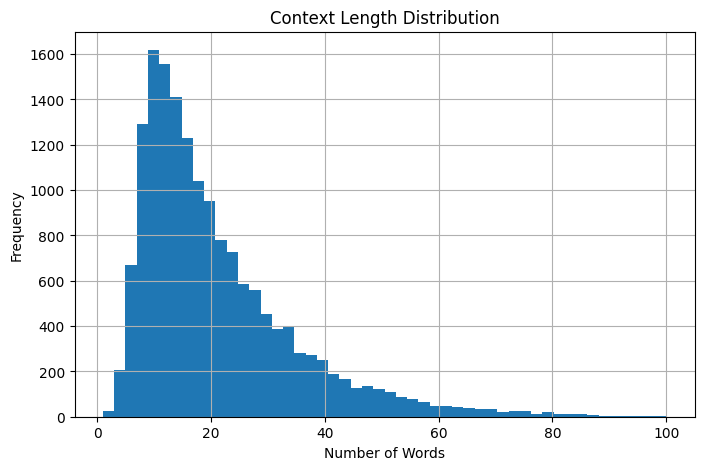

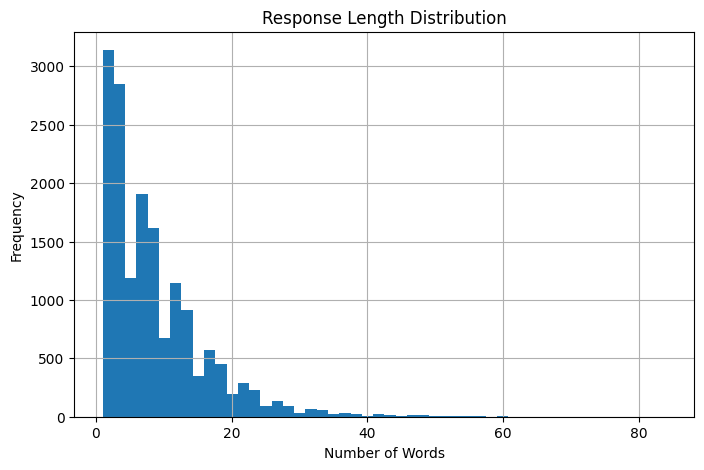

In [11]:
import matplotlib.pyplot as plt

# Context Length
plt.figure(figsize=(8,5))
df["context_len"].hist(bins=50)
plt.title("Context Length Distribution")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

# Response Length
plt.figure(figsize=(8,5))
df["response_len"].hist(bins=50)
plt.title("Response Length Distribution")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()


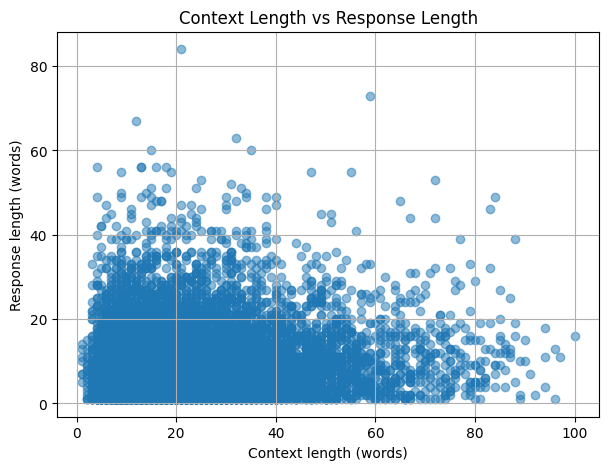

In [12]:
plt.figure(figsize=(7,5))
plt.scatter(df["context_len"], df["response_len"], alpha=0.5)
plt.xlabel("Context length (words)")
plt.ylabel("Response length (words)")
plt.title("Context Length vs Response Length")
plt.grid(True)
plt.show()
